## Exploratory Data Analysis for Demand Data

In [2]:
import pandas as pd
from datetime import datetime, timedelta
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [146]:
df_initial = pd.read_pickle('./DemandDataFile', compression='infer')
df_region = pd.read_pickle('./RegionDataFile', compression='infer')
df_initial = pd.merge(df_initial, df_region, how='inner', right_on=['CITY_NAME'], left_on=['CITY'])
df_initial = df_initial.drop(['CITY_NAME'], axis=1)
df_initial = df_initial[~df_initial['PRODUCT_NAME'].str.contains("Small Flyers|Large Flyers|Meter Bubble Wrap|Bundle of 50 Boxes", na=False)]
print(df_initial.shape)

(2917531, 21)


In [147]:
df_initial.rename(columns = {'ORDER_DATE':'DATE'},inplace = True)

In [4]:
df_initial[df_initial.CITY == 'Karachi']

,COD_ORDER_NR,SKU,DATE,CATEGORY_LEVEL_1,CATEGORY_LEVEL_2,CATEGORY_LEVEL_3,CATEGORY_LEVEL_4,PRODUCT_NAME,BRAND_NAME,UNIT_PRICE,...,PRODUCT_WEIGHT,CUSTOMER_DEVICE,PAYMENT_OPTION,CTV,Gender,CITY,Voucher,MV,Quantity,REGION_NAME
0,305332633,MA305FA1CS0BSNAFAMZ,2018-03-06,Women's Fashion,Women's Clothing,Lingerie & Sleepwear,Shapewear,Beige Polyester Body Shaper For Women,Mardaz,934.15,...,0.5,Android,COD,1537757,male,Karachi,NaN,934.15,1,Sindh
2,345719922,BO498EL103VHSNAFAMZ,2018-05-06,Phones & Tablets,Phone & Tablet Accessories,Cases & Covers,Android Tablets,Universal 9 Inch Tablet Cover - Brown,Boorak,380.00,...,0.5,Android,COD,1727270,female,Karachi,NaN,380.00,1,Sindh
3,305857193,FR892HB0AR6BQNAFAMZ,2018-02-10,Beauty & Health,Skin Care,Face Masks & Packs,N/A,Facial Purifying Clay Mask Clean Pores & Sooth...,Freeman,405.10,...,0.2,Mobile (Theme),COD,1457029,N/A,Karachi,NaN,405.10,1,Sindh
4,309725313,UM501EL188VKMNAFAMZ,2018-03-04,Phones & Tablets,Phone & Tablet Accessories,Other Accessories,Others,Universal Flexible Mobile Stand - Purple,UMW,137.00,...,0.2,Android,COD,1532585,male,Karachi,NaN,274.00,2,Sindh
5,357171122,NA406FA1DD3G4NAFAMZ,2018-05-22,Men's Fashion,Men's Accessories,Jewellery,Bracelets,Silver Chain Men Bracelet,Naya Rung,145.00,...,0.2,Android,COD,1781749,male,Karachi,13.61,131.39,1,Sindh
6,309755181,SE989SP179JQ8NAFAMZ,2017-12-20,Sports & Travel,Exercise & Fitness,Fitness Supplements & Proteins,Supplements,Cod Liver Oil - 120 Capsules,Seven Seas,1590.00,...,0.5,Mobile (Theme),COD,1314449,N/A,Karachi,NaN,1590.00,1,Sindh
7,306296171,SH564FA0M8IESNAFAMZ,2017-12-27,Men's Fashion,Men's Accessories,Jewellery,Rings,Superman-Batman Stainless Steel Ring - Silver,SHS Gifts,200.00,...,0.2,Mobile (Theme),COD,797253,N/A,Karachi,0.00,200.00,1,Sindh
8,304199261,PE159HB10TROENAFAMZ,2017-12-04,Beauty & Health,Personal Care,Hair Removal Tools,Waxes,Pack Of 2 - Cotton Wax Strip - Large,PeachStore,282.00,...,0.2,Mobile (Theme),COD,1269031,N/A,Karachi,NaN,282.00,1,Sindh
9,392935742,MA889HB1H3W2ANAFAMZ,2018-04-04,Beauty & Health,Makeup,Face,Highlighters,Makeup revolution Liquid Highlighter Liquid Ch...,Makeup Revolution London,1100.00,...,0.2,Desktop,COD,1449947,female,Karachi,NaN,1100.00,1,Sindh
10,306371213,EL555EL0Q8TPCNAFAMZ,2018-02-28,Phones & Tablets,Phone & Tablet Accessories,Cases & Covers,Android Phones,Designer Back Cover for Elephone S7 - FighterJet,Elephone,199.00,...,0.2,Android,COD,1009301,male,Karachi,NaN,199.00,1,Sindh


In [5]:
totalDays = 180 
MinHistoryDays = int(totalDays * 0.02)

temp = df_initial.groupby(['SKU'])['DATE'].count().to_frame('Count').reset_index()
temp = temp[temp.Count >= MinHistoryDays]

df_initial = pd.merge(df_initial, temp, how='inner')

df_initial.Voucher[df_initial.Voucher > 0] = True
df_initial.Voucher[df_initial.Voucher != True] = False

/home/danyal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/danyal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
df_initial['CatConcat'] = df_initial[['CATEGORY_LEVEL_1', 'CATEGORY_LEVEL_2','CATEGORY_LEVEL_3','CATEGORY_LEVEL_4']].apply(lambda x: ' | '.join(x.str.strip()), axis=1)

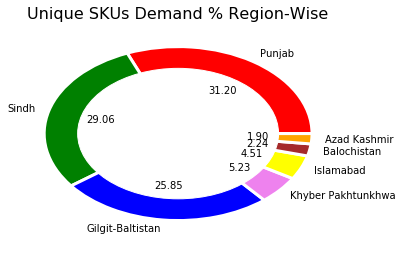

In [13]:
temp = df_initial.groupby(by=['REGION_NAME'], as_index=False)['Quantity'].sum()
temp.sort_values('Quantity',ascending=False, inplace = True)

regions = temp['REGION_NAME'][:7]
values = temp['Quantity'][:7]
my_circle=plt.Circle( (0,0), 0.75, color='white')
# Give color names
plt.pie(values, labels=regions, colors=['red','green','blue','violet','yellow','brown','orange'],wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%.2f')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unique SKUs Demand % Region-Wise', fontsize= 16)
plt.show()


In [44]:
print('Total Valid Orders count in 6 Month (Dec 17 - May 18) : ', df_initial.COD_ORDER_NR.nunique())
print('Unique SKUs in 6 Month (Dec 17 - May 18) : ', df_initial.SKU.nunique())
print('Unique "Category Level 1" in 6 Month (Dec 17 - May 18) : ', df_initial.CATEGORY_LEVEL_1.nunique())
temp = df_initial[df_initial.Voucher == True]
print('Total Valid Orders count with Voucher Used in 6 Month (Dec 17 - May 18) : ', temp.COD_ORDER_NR.nunique())
print('Total Sum of Valid Items in 6 Month (Dec 17 - May 18) : ', df_initial.Quantity.sum())
print('Total MV of demanded items in 6 Month (Dec 17 - May 18) : ', df_initial.MV.sum())


Total Orders count in 6 Month (Dec 17 - May 18) :  1486223
Unique SKUs in 6 Month (Dec 17 - May 18) :  151911
Unique "Category Level 1" in 6 Month (Dec 17 - May 18) :  21
Total Orders count with Voucher Used in 6 Month (Dec 17 - May 18) :  162893
Total Sum of Valid Items demand in 6 Month (Dec 17 - May 18) :  5535948
Total MV of demanded items in 6 Month (Dec 17 - May 18) :  6299830843.0


Text(0.5,1,'Gender-wise Orders Count')

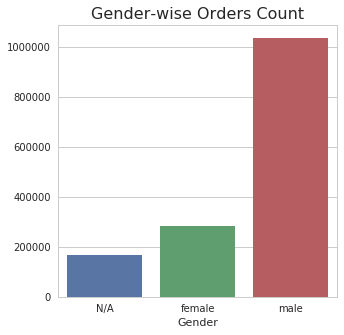

In [48]:
f, ax = plt.subplots(figsize=(5,5))
sns.set_style("whitegrid")
sns.barplot(x=df_initial.groupby(['Gender'])['COD_ORDER_NR'].nunique().index,
                 y=df_initial.groupby(['Gender'])['COD_ORDER_NR'].nunique().values)

plt.title('Gender-wise Orders Count', fontsize=16)

In [24]:
df_initial['PRICE_MEDIAN'] = df_initial.groupby('SKU')['UNIT_PRICE'].transform('median')

In [25]:
df_initial['WEEKDAY'] = df_initial['DATE'].apply(lambda x:calendar.day_name[x.weekday()])
df_initial['MONTH'] = df_initial['DATE'].apply(lambda x:calendar.month_abbr[x.month])

Text(0.5,1,'Gender-wise Orders Count with Voucher used')

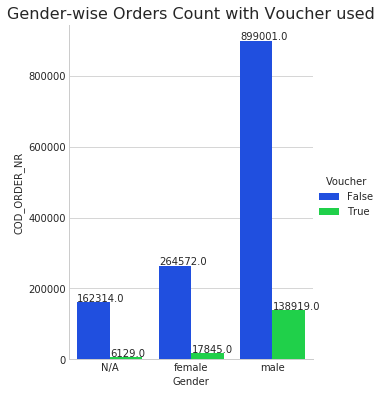

In [128]:
temp = df_initial.groupby(['Gender','Voucher'])['COD_ORDER_NR'].nunique().reset_index()
sns.set_style('whitegrid')

g = sns.factorplot(x='Gender', y='COD_ORDER_NR', hue='Voucher', data=temp, kind='bar')
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 1.2, box.height * 1.4]) # resize position
for p in g.ax.patches:
    g.ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Gender-wise Orders Count with Voucher used', fontsize=16)


Text(0.5,1,'Gender Level Expenditure Breakdown by Device')

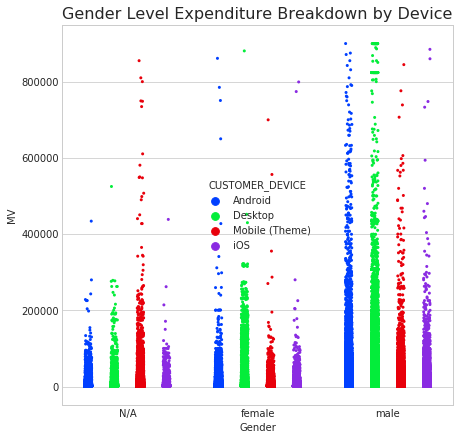

In [202]:
sns.set_style("whitegrid")
temp = df_initial.groupby(['Gender','COD_ORDER_NR','CUSTOMER_DEVICE'])['MV'].sum().reset_index()
f, ax = plt.subplots(figsize=(7,7))
sns.set_palette("bright")
#ax = sns.boxplot(x="Voucher", y="Quantity", data=df_initial)
ax = sns.stripplot(size=3,dodge=True,x="Gender", y="MV", hue="CUSTOMER_DEVICE", data=temp[temp.MV <= 900000],jitter=True)
plt.title('Gender Level Expenditure Breakdown by Device', fontsize=16)

In [112]:
print('Device Usage Breakdown by Gender Male\n-------------------------------------- \n' , pd.DataFrame(temp[temp.Gender == 'male'].CUSTOMER_DEVICE.value_counts()),'\n\n')
print('Device Usage Breakdown by Gender Female\n---------------------------------------- \n' , pd.DataFrame(temp[temp.Gender == 'female'].CUSTOMER_DEVICE.value_counts()),'\n\n')
print('Device Usage Breakdown by Gender N/A\n-------------------------------------- \n' , pd.DataFrame(temp[temp.Gender == 'N/A'].CUSTOMER_DEVICE.value_counts()),'\n\n')

Device Usage Breakdown by Gender Male
-------------------------------------- 
                 CUSTOMER_DEVICE
Android                  597616
Desktop                  228474
Mobile (Theme)           131894
iOS                       78029 


Device Usage Breakdown by Gender Female
---------------------------------------- 
                 CUSTOMER_DEVICE
Android                  150973
Mobile (Theme)            57572
Desktop                   43583
iOS                       29796 


Device Usage Breakdown by Gender N/A
-------------------------------------- 
                 CUSTOMER_DEVICE
Mobile (Theme)           123548
Android                   26037
Desktop                   12459
iOS                        6242 




(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

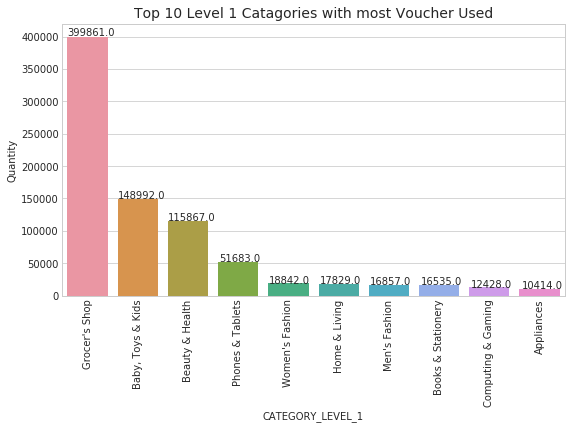

In [132]:
temp = df_initial[df_initial.Voucher == True].groupby(['CATEGORY_LEVEL_1'])['Quantity'].sum().reset_index()

f, ax = plt.subplots(figsize=(9,5))

temp.sort_values('Quantity',ascending=False, inplace = True)

ax = sns.barplot(x='CATEGORY_LEVEL_1', y='Quantity', data=temp[:10])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Top 10 Level 1 Catagories with most Voucher Used', fontsize=14)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

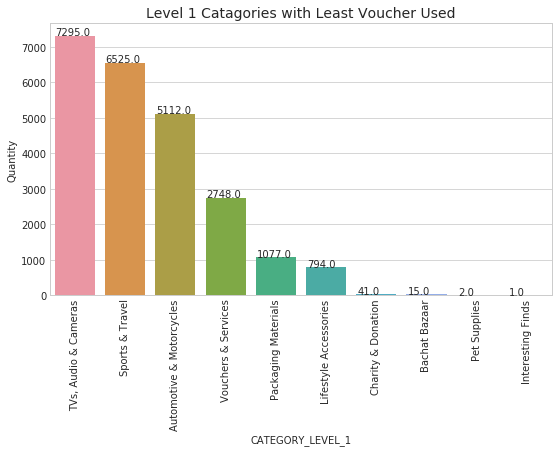

In [133]:
f, ax = plt.subplots(figsize=(9,5))

temp.sort_values('Quantity',ascending=False, inplace = True)

ax = sns.barplot(x='CATEGORY_LEVEL_1', y='Quantity', data=temp[-10:])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Level 1 Catagories with Least Voucher Used', fontsize=14)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

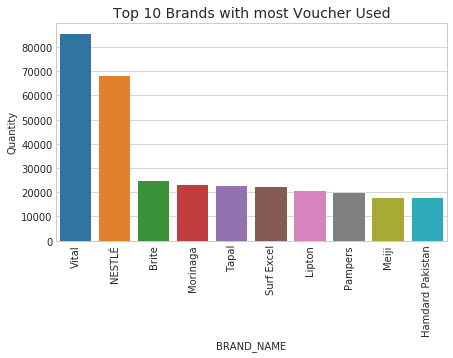

In [12]:
temp = df_initial[df_initial.Voucher == True].groupby(['BRAND_NAME'])['Quantity'].sum().reset_index()

f, ax = plt.subplots(figsize=(7,4))

temp.sort_values('Quantity',ascending=False, inplace = True)

sns.barplot(x='BRAND_NAME', y='Quantity', data=temp[:10])
plt.title('Top 10 Brands with most Voucher Used', fontsize=14)
plt.xticks(rotation=90)

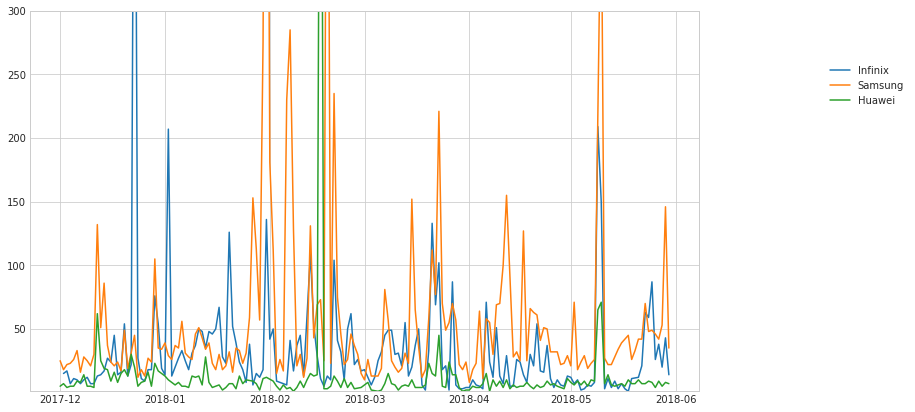

In [16]:
temp = df_initial[df_initial.CITY == 'Karachi'][['DATE','BRAND_NAME','Quantity']].groupby(by=['DATE','BRAND_NAME'])['Quantity'].sum().reset_index()
temp = temp[temp.BRAND_NAME.isin(['Samsung','Infinix','Huawei'])]

fig, ax = plt.subplots(figsize=(12, 7))
# graph = pd.Series(temp.iloc[:0,-1])
# graph.plot(ax=ax,use_index=False,legend = True)
temp = temp.iloc[:,[0,-1,1]]

ax.plot(temp[temp.BRAND_NAME == 'Infinix']['DATE'],temp[temp.BRAND_NAME == 'Infinix']['Quantity'],label="Infinix")
ax.plot(temp[temp.BRAND_NAME == 'Samsung']['DATE'],temp[temp.BRAND_NAME == 'Samsung']['Quantity'],label="Samsung")
ax.plot(temp[temp.BRAND_NAME == 'Huawei']['DATE'],temp[temp.BRAND_NAME == 'Huawei']['Quantity'],label="Huawei")
#ax.plot(temp[temp.BRAND_NAME == 'Samsung']['DATE'],temp[temp.BRAND_NAME == 'Samsung']['Quantity'],label="Samsung")
ax.set(ylim=(1, 300))
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.88), shadow=True, ncol=1)


In [15]:
def CreateLinePlots(dataFrame,Cat1,Cat2,SelectColumnName,ValueList,yUpperLimit):
    if ValueList!= None:
         dataFrame = dataFrame[dataFrame[SelectColumnName].isin(ValueList)]
    else:
        ValueList = dataFrame[(dataFrame.CATEGORY_LEVEL_1 == Cat1)
                            & (dataFrame.CATEGORY_LEVEL_2 == Cat2)][SelectColumnName].value_counts()[:3].index.tolist()
        print(ValueList)
        dataFrame = dataFrame[(dataFrame.CATEGORY_LEVEL_1 == Cat1)
                            & (dataFrame.CATEGORY_LEVEL_2 == Cat2)
                            & (dataFrame[SelectColumnName].isin(ValueList))]
    
    dataFrame = dataFrame[['DATE',SelectColumnName,'Quantity']].groupby(by=['DATE',SelectColumnName])['Quantity'].sum().reset_index()

    fig, ax = plt.subplots(figsize=(12, 7))
    dataFrame = dataFrame.iloc[:,[0,-1,1]]
    for item in ValueList:
        ax.plot(dataFrame[dataFrame[SelectColumnName] == item]['DATE'],dataFrame[dataFrame[SelectColumnName] == item]['Quantity'],label=item)
        
    ax.set(ylim=(1, yUpperLimit))
    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)


        #temp = dataFrame.groupby(by=['DATE'])['Quantity'].sum().reset_index()
    plt.ylabel('Quantity Demand in a Day')
    plt.title('Historical Demand Trend Comparision between Brands', fontsize=16)
    return 0


0

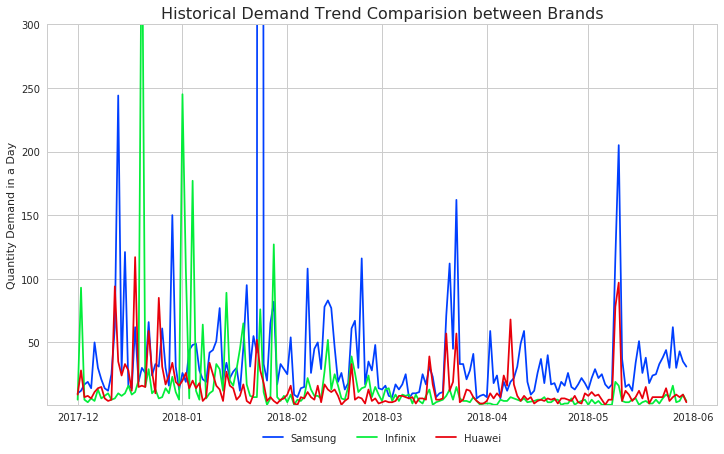

In [117]:
CreateLinePlots(df_initial[df_initial.CITY == 'Lahore'],'Phones & Tablets','Mobile Phones','BRAND_NAME',['Samsung','Infinix','Huawei'],300)

In [150]:
df_initial['WEEKDAY'] = df_initial['DATE'].apply(lambda x:calendar.day_name[x.weekday()])
df_initial['MONTH'] = df_initial['DATE'].apply(lambda x:calendar.month_abbr[x.month])


#### TOP 5 Most Contributing Categories MV wise / month 

,MONTH,CATEGORY_LEVEL_1,MV,Total,% Contribution to total MV
3,Jan,"Phones & Tablets | Computing & Gaming | TVs, Audio & Cameras | Appliances | Beauty & Health",9.500319e+08,1.202427e+09,79.009521
2,Feb,"Phones & Tablets | TVs, Audio & Cameras | Computing & Gaming | Appliances | Beauty & Health",1.075074e+09,1.303678e+09,82.464664
4,Mar,"Phones & Tablets | Appliances | Computing & Gaming | TVs, Audio & Cameras | Women's Fashion",1.181712e+09,1.551668e+09,76.157536
0,Apr,"Phones & Tablets | Appliances | Computing & Gaming | TVs, Audio & Cameras | Baby, Toys & Kids",6.693197e+08,9.643001e+08,69.409898
5,May,"Phones & Tablets | Appliances | Computing & Gaming | TVs, Audio & Cameras | Baby, Toys & Kids",8.054408e+08,1.147781e+09,70.173713
1,Dec,"Phones & Tablets | TVs, Audio & Cameras | Appliances | Computing & Gaming | Men's Fashion",6.057222e+08,8.527912e+08,71.028198


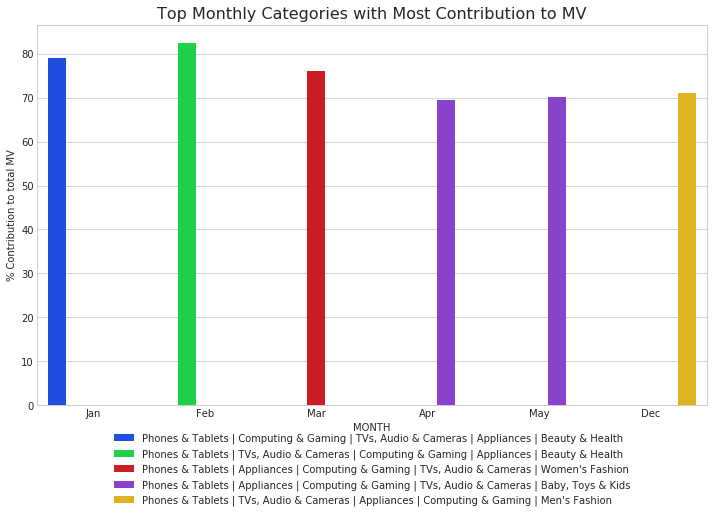

In [287]:
colName = 'MV'
temp = df_initial.groupby(by=['MONTH','CATEGORY_LEVEL_1'], as_index=False)[colName].sum()
temp = temp.loc[temp.groupby('MONTH')[colName].nlargest(5).reset_index()['level_1']]

temp = temp.groupby(['MONTH'],as_index=False).agg(lambda x : x.sum() if ((x.dtype=='int64') | ((x.dtype=='float64'))) else ' | '.join(x))
temp['Total'] = df_initial.groupby(by=['MONTH'], as_index=False)[colName].sum()[colName]
temp['% Contribution to total MV'] = (temp[colName] / temp['Total'])*100

temp["MONTH"] = pd.to_datetime(temp.MONTH, format='%b', errors='coerce').dt.month
temp.sort_values('MONTH',ascending=True, inplace = True)

temp.MONTH = temp.MONTH.apply(lambda x: datetime(2018, int(x), 1).strftime("%b"))
#temp.MONTH = datetime(2012, int(temp.MONTH), 1).formated_month.strftime("%b")
fig, ax = plt.subplots(figsize=(12, 7))
sns.set_style('whitegrid')
g = sns.barplot(x='MONTH', y='% Contribution to total MV', hue='CATEGORY_LEVEL_1', data=temp)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=1)

plt.title('Top Monthly Categories with Most Contribution to ' + colName, fontsize=16)

temp

In [ ]:
def generateMonthlyTopCatagoriesPlt(data,title):
    data.sort_values('Quantity',ascending=False, inplace = True)
    sns.set_style('whitegrid')
    g = sns.factorplot(x='MONTH', y='Quantity', hue='CatConcat', data=data, kind='bar')
    box = g.ax.get_position()
    g.ax.set_position([box.x0 , box.y0, box.width * 1.2, box.height * 1.0]) # resize position
    #g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05),fancybox=True, shadow=True, ncol=5)
    g.despine(left=False)
    #g.fig.get_axes()[0].legend(loc='upper right')
    #plt.legend(loc='upper center')
    plt.title(title, fontsize=16)

    
for x in months:
    data = temp[temp.MONTH == x]
    if data.shape[0] > 0:
        generateMonthlyTopCatagoriesPlt(data,'Top Demanded Catagories for Month : ' + x)
       

In [134]:
temp = df_initial.groupby(by=['MONTH'], as_index=False)['Quantity'].sum()
temp['Assortment% Demand'] = ((temp.Quantity/df_initial.Quantity.sum())*100).round(decimals = 1)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
temp['MONTH'] = pd.Categorical(temp['MONTH'], categories=months, ordered=True)
temp.sort_values('MONTH',ascending=True, inplace = True)
temp

,MONTH,Quantity,Assortment% Demand
3,Jan,1222222,22.1
2,Feb,1377281,24.9
4,Mar,1065411,19.2
0,Apr,645361,11.7
5,May,751783,13.6
1,Dec,473890,8.6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), <a list of 12 Text xticklabel objects>)

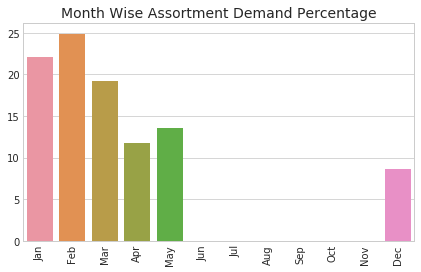

In [135]:
f, ax = plt.subplots(figsize=(7,4))

ax = sns.barplot(x=temp['MONTH'].values,
                 y=temp['Assortment% Demand'].values)
plt.title('Month Wise Assortment Demand Percentage', fontsize=14)
plt.xticks(rotation=90)

In [39]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/danyal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/danyal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/danyal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [123]:
import os
from functools import partial
import spacy as spacy #load spacy
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import os
import string
from spacy.lang.en import English

nlp = spacy.load('en')
stops = stopwords.words("english")
punctuations = string.punctuation

parser = English()

def normalize(comment, lowercase, remove_stopwords):
        #comment = df_initial[df_initial.SKU == key]['PRODUCT_NAME'].unique()[0]
        key = comment.split('-*-')[0]
        comment = comment.split('-*-')[1]
        if lowercase:
            comment = comment.lower()
        comment = nlp(comment)
        lemmatized = list()
        for word in comment:
            lemma = word.lemma_.strip()
            if lemma:
                if not remove_stopwords or (len(lemma) > 2 and remove_stopwords and lemma not in stops and lemma not in punctuations):
                    lemmatized.append(lemma)
        return (key," ".join(lemmatized))

#mapfunc = partial(normalize, lowercase=True,remove_stopwords=True)

def dask_tokenizer(df):
    df_initial['PRODUCT_STEMMED'] = list(map(mapfunc, df_initial['PRODUCT_NAME']))
    return df_initial

In [124]:
if os.path.exists('./ProcessedDemandDataFile'):
    cleanedProductNames = pd.read_pickle('./ProcessedDemandDataFile', compression='infer')
    cleanedProductNames.columns = ['SKU','PRODUCT_STEMMED']
    df_initial = pd.merge(df_initial, cleanedProductNames, how='inner')
    print('File Found')
else:
    df_initial['PRODUCT_STEMMED'] = 'Null'
    print('File Not Found..Creating')
    mapfunc = partial(normalize, lowercase=True,remove_stopwords=True)
    #df_initial[['SKU','PRODUCT_NAME']].apply(lambda x: '--'.join(x.str.strip()), axis=1)
    %time temp = df_initial['SKU'].map(str)+'-*-'+df_initial['PRODUCT_NAME'].map(str)
    %time cleanedProductNames = list(temp.drop_duplicates().apply(normalize, lowercase=True, remove_stopwords=True))
    pd.DataFrame(cleanedProductNames).to_pickle('./ProcessedDemandDataFile',compression='infer', protocol=4)

File Found


In [129]:
def generateWordCloud(text,maxWords,title):
    wordcloud = WordCloud(max_font_size=45,max_words=maxWords,background_color="black").generate(text)
    plt.subplots(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title,fontsize=18)
    plt.axis("off")
    plt.show()

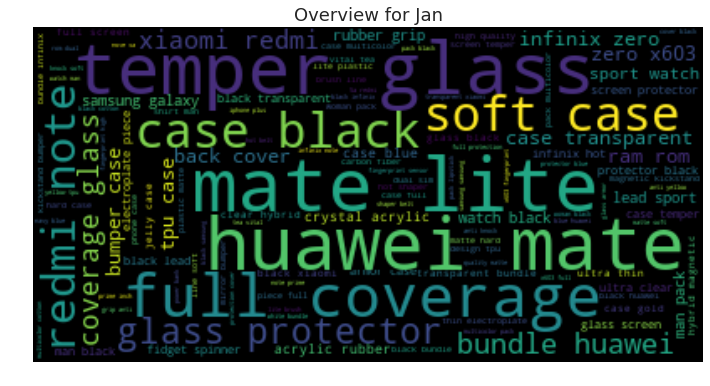

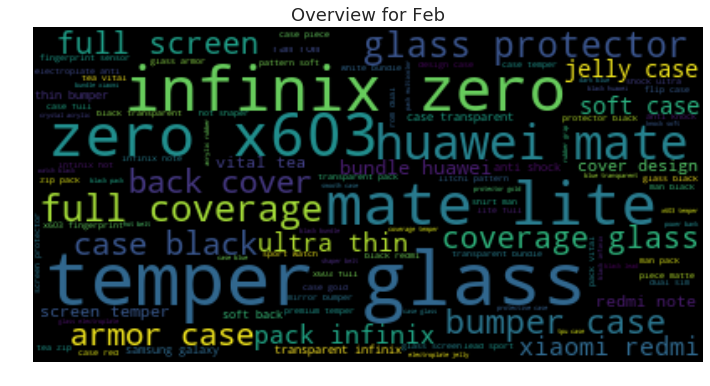

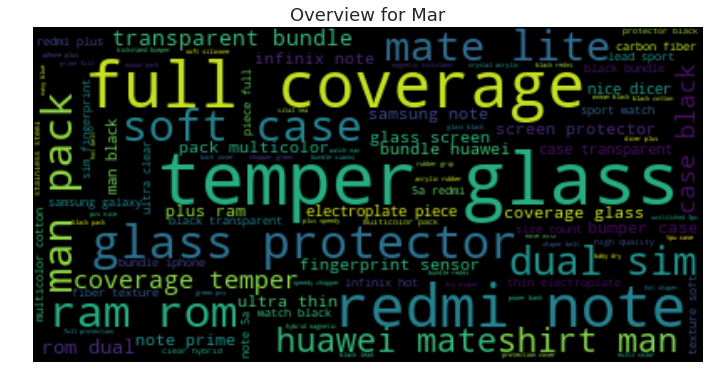

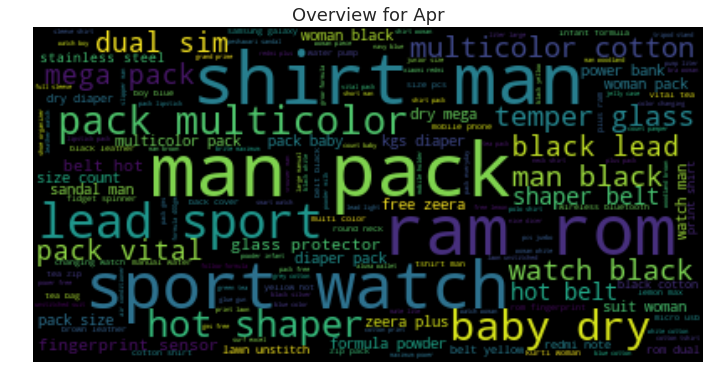

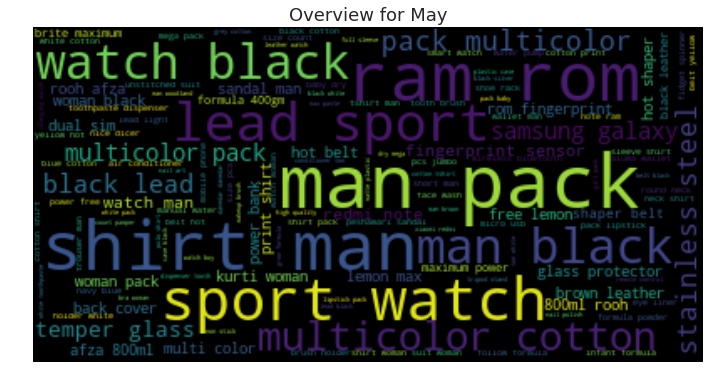

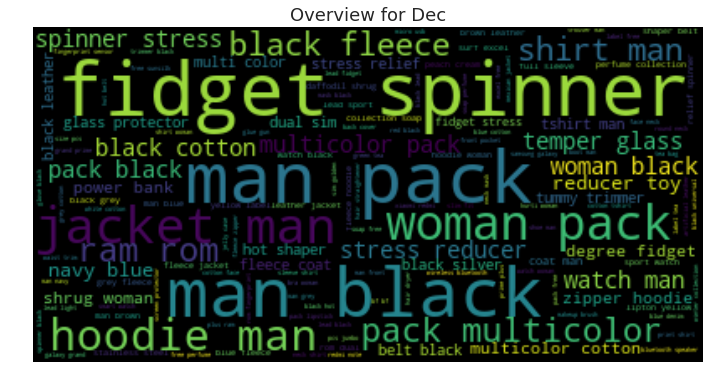

In [130]:
from wordcloud import WordCloud
for x in months:
    temp = df_initial[df_initial.MONTH == x]
    if temp.shape[0] > 0:
        allText = ', '.join(temp.PRODUCT_STEMMED)
        generateWordCloud(allText,200,'Overview for ' + x)

(array([     0,  85000, 170000, 255000, 340000, 425000, 510000, 595000,
        680000, 765000, 850000]), <a list of 11 Text xticklabel objects>)

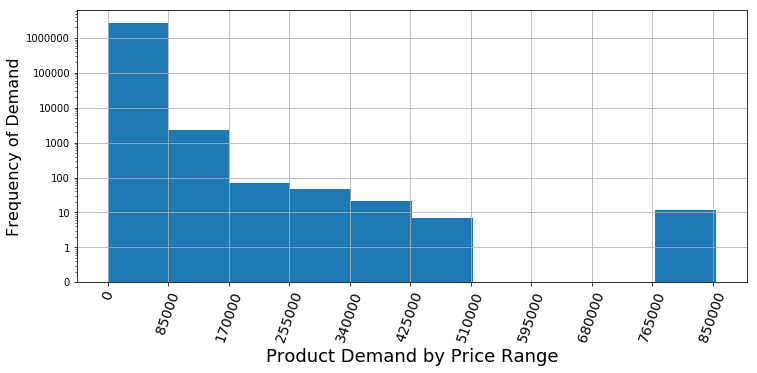

In [26]:
from matplotlib.ticker import FuncFormatter
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)

fig, ax = plt.subplots(figsize=(12, 5))
#bins = np.arange(0,60,5) , use bins=bins in hist function below for smaller values
df_initial['PRICE_MEDIAN'].hist(ax=ax, bottom=0.1)

formatter = FuncFormatter(log_10_product)
ax.set_yscale('log')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(range(0, int(df_initial['PRICE_MEDIAN'].max()), int(85000)), fontsize=14)
plt.xlabel('Product Demand by Price Range', fontsize=18)
plt.ylabel('Frequency of Demand', fontsize=16)
plt.xticks(rotation=70)


In [127]:
# df_initial[df_initial.PRICE_MEDIAN >= 800000]

In [138]:
#temp = df_initial[['MONTH','CATEGORY_LEVEL_1']]
#temp = df_initial.groupby(by=['MONTH','CATEGORY_LEVEL_1'], as_index=False)['DATE'].count()
temp = df_initial[df_initial.CATEGORY_LEVEL_1 == 'Phones & Tablets'].groupby(by=['MONTH','PRODUCT_NAME'], as_index=False)['DATE'].count()
months = ["Dec","Jan", "Feb", "Mar", "Apr", "May"]
temp['MONTH'] = pd.Categorical(temp['MONTH'], categories=months, ordered=True)
temp.sort_values('MONTH',ascending=True, inplace = True)
temp[temp.DATE > 400].shape
#temp[:10]

(34, 3)

Text(0.5,1,'Clothing category demand comparision Month wise')

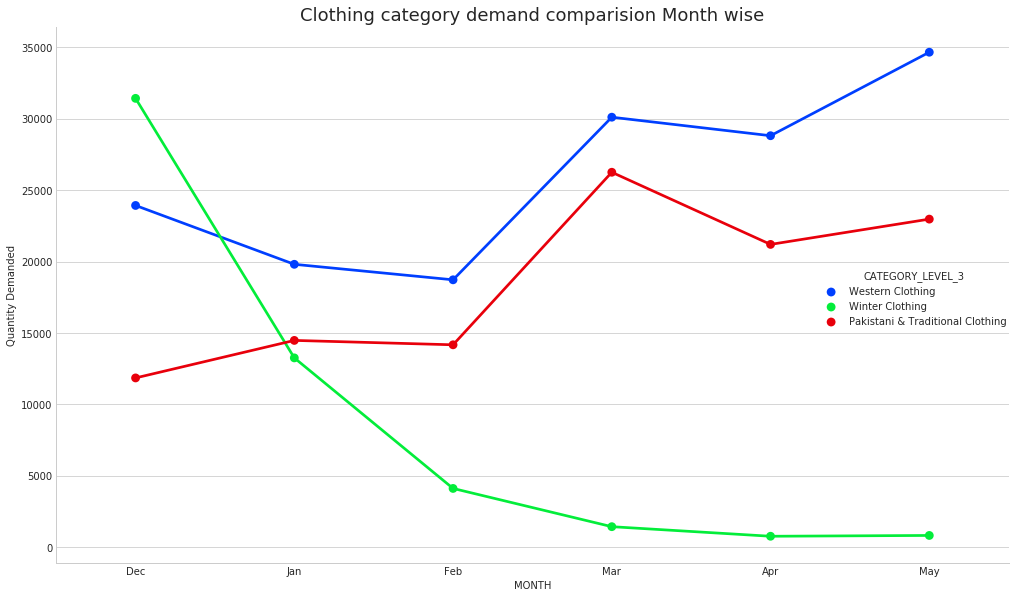

In [174]:
columnName = 'DATE'
temp = df_initial.groupby(by=['MONTH','CATEGORY_LEVEL_3'], as_index=False)[columnName].count()
months = ["Dec","Jan", "Feb", "Mar", "Apr", "May"]
temp['MONTH'] = pd.Categorical(temp['MONTH'], categories=months, ordered=True)
temp.sort_values('MONTH',ascending=True, inplace = True)
temp.rename(columns = {columnName:'Quantity Demanded'},inplace = True)
g = sns.factorplot(x="MONTH", y="Quantity Demanded", hue='CATEGORY_LEVEL_3',
                    data=temp[(temp['Quantity Demanded'] >= 100) &
                              ((temp['CATEGORY_LEVEL_3'] == 'Winter Clothing') |
                               (temp['CATEGORY_LEVEL_3'] == 'Western Clothing') |
                               (temp['CATEGORY_LEVEL_3'] == 'Pakistani & Traditional Clothing'))],
                    kind="point", size=10, aspect=1)
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 1.5, box.height * 0.8]) # resize position
plt.title('Clothing category demand comparision Month wise', fontsize=18)

Text(0.5,1,'Trend for Smart Phones randomly selected')

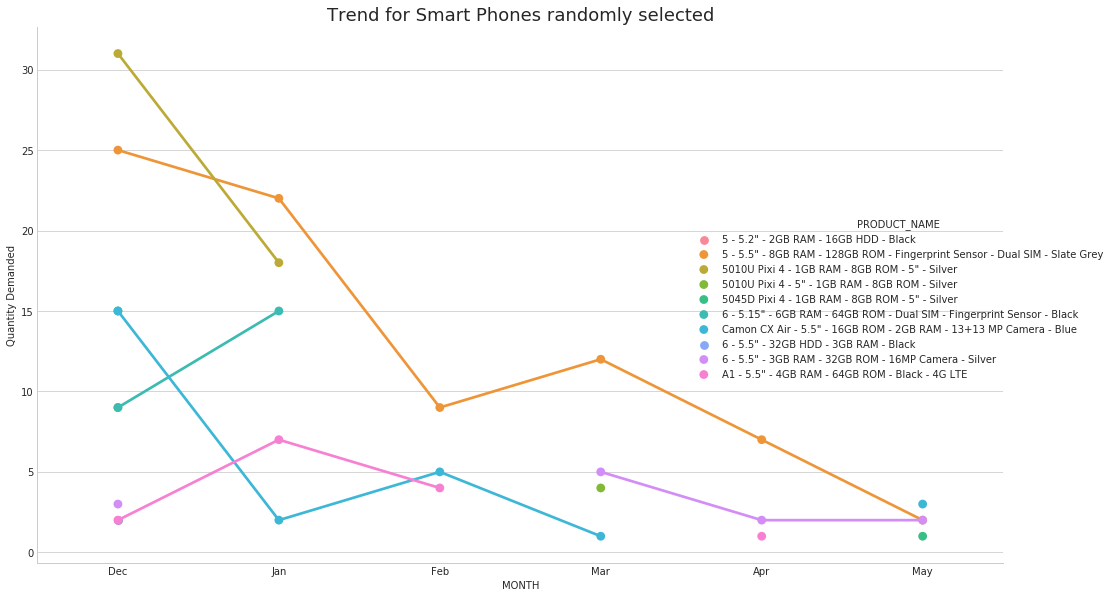

In [165]:
temp = df_initial[(df_initial.CATEGORY_LEVEL_1 == 'Phones & Tablets') 
           & (df_initial.CATEGORY_LEVEL_2 == 'Mobile Phones')
           & (df_initial.CATEGORY_LEVEL_3 == 'Smartphones')].groupby(by=['MONTH','PRODUCT_NAME'], as_index=False)['DATE'].count()
months = ["Dec","Jan", "Feb", "Mar", "Apr", "May"]
temp['MONTH'] = pd.Categorical(temp['MONTH'], categories=months, ordered=True)
temp.sort_values('MONTH',ascending=True, inplace = True)
prod_list = temp.PRODUCT_NAME.unique()
temp.rename(columns = {'DATE':'Quantity Demanded'},inplace = True)
g = sns.factorplot(x="MONTH", y="Quantity Demanded", hue='PRODUCT_NAME',
                    data=temp[temp.PRODUCT_NAME.isin(prod_list[30:40])],
                    kind="point", size=10, aspect=1)
# resize figure box to -> put the legend out of the figure
box = g.ax.get_position() # get position of figure
g.ax.set_position([box.x0, box.y0, box.width * 1.5, box.height * 0.8]) # resize position
plt.title('Trend for Smart Phones randomly selected', fontsize=18)


In [164]:
 df_initial[(df_initial.CATEGORY_LEVEL_1 == 'Phones & Tablets') 
           & (df_initial.CATEGORY_LEVEL_2 == 'Mobile Phones')
           & (df_initial.CATEGORY_LEVEL_3 == 'Smartphones')]['PRODUCT_NAME'].unique()[:10]

array(['Redmi Note 4 - 5.5" - 4GB RAM - 64GB ROM - Fingerprint Sensor - Golden',
       'C A2020 - Vibe - 8GB - White',
       'Smart X - 4.99" - 16GB - 1GB RAM - 8+2 MP - Black',
       'Hot 5 - 5.5" - 16GB - 2GB RAM - 8+5MP - 3G - Gold',
       'iPhone-X - 5.8" - 3GB RAM - 64GB ROM - Without Face time - Space Gray',
       'P Smart - 5.7" - Ips Lcd Capacitive Touchscreen - 3gb Ram + 32gb Rom - 4g - Blue',
       'Galaxy S8 - 5.8"- 4GB RAM - 64GB ROM - Fingerprint Sensor - Midnight Black',
       'Redmi Note 4 - 5.5" - 3GB RAM - 32GB ROM - Fingerprint Sensor - Grey',
       'Redmi Note 4 - 5.5" - 4GB RAM - 64GB ROM - Fingerprint Sensor - Black',
       'Redmi 5 Plus - 5.99" - 3GB RAM - 32GB ROM - Dual SIM - Fingerprint Sensor - Black'],
      dtype=object)

In [162]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
#pd.DataFrame(temp.PRODUCT_NAME.unique())
#temp
